In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,average_precision_score,precision_recall_curve,precision_score,recall_score
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

In [88]:
data=pd.read_csv(r"C:\Users\suraj\Downloads\archive (19)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=data.drop(columns='customerID')

In [89]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6262,Female,0,No,No,45,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),96.75,4442.75,No
5200,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,7397,No
2569,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.85,1871.85,No
5568,Female,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),95.10,4060.55,No
614,Male,0,No,No,50,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),69.50,3418.2,No
5565,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
2015,Female,0,Yes,Yes,28,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,49.90,1410.25,No
5511,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),76.95,5289.8,No
366,Male,0,Yes,No,23,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No
984,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.75,1679.25,No


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [91]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [92]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [93]:
df.dropna(inplace=True)

In [94]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
df.duplicated().sum()

22

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
x=df.drop(columns="Churn")
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [98]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
num_cols=['tenure','MonthlyCharges', 'TotalCharges']
cat_cols=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [100]:
preprocessor=ColumnTransformer(
    transformers=[
    ('cat',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_cols),
    ('num',StandardScaler(),num_cols)
    ]
)

In [101]:
log_reg_pipeline=Pipeline(
    steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000,class_weight='balanced'))
    ]
)

In [102]:
log_reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [103]:
log_reg_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [104]:
log_pred=log_reg_pipeline.predict(x_test)
log_prob=log_reg_pipeline.predict_proba(x_test)[:,1]

In [105]:
log_prob

array([0.19784634, 0.19464297, 0.72130923, ..., 0.72750272, 0.04432267,
       0.35876123])

In [106]:
print(classification_report(y_test,log_pred))
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
pr_auc_log=average_precision_score(y_test_binary,log_prob)
print('PR_AUC_LOGISTIC',pr_auc_log)

              precision    recall  f1-score   support

          No       0.93      0.72      0.81      1081
         Yes       0.46      0.82      0.59       321

    accuracy                           0.74      1402
   macro avg       0.70      0.77      0.70      1402
weighted avg       0.82      0.74      0.76      1402

PR_AUC_LOGISTIC 0.6411519610254635


In [107]:
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (log_prob >= t).astype(int)
    p = precision_score(y_test_binary, preds)
    r = recall_score(y_test_binary, preds)
    print(f"Threshold={t:.2f} | Precision={p:.2f} | Recall={r:.2f}")

Threshold=0.10 | Precision=0.30 | Recall=0.98
Threshold=0.15 | Precision=0.32 | Recall=0.98
Threshold=0.20 | Precision=0.34 | Recall=0.96
Threshold=0.25 | Precision=0.35 | Recall=0.95
Threshold=0.30 | Precision=0.37 | Recall=0.93
Threshold=0.35 | Precision=0.39 | Recall=0.92
Threshold=0.40 | Precision=0.41 | Recall=0.89
Threshold=0.45 | Precision=0.44 | Recall=0.85
Threshold=0.50 | Precision=0.46 | Recall=0.82
Threshold=0.55 | Precision=0.49 | Recall=0.77
Threshold=0.60 | Precision=0.52 | Recall=0.73
Threshold=0.65 | Precision=0.55 | Recall=0.67
Threshold=0.70 | Precision=0.59 | Recall=0.62
Threshold=0.75 | Precision=0.65 | Recall=0.53
Threshold=0.80 | Precision=0.73 | Recall=0.40
Threshold=0.85 | Precision=0.76 | Recall=0.24


In [108]:
precision, recall, thresholds = precision_recall_curve(
    y_test_binary,
    log_prob
)


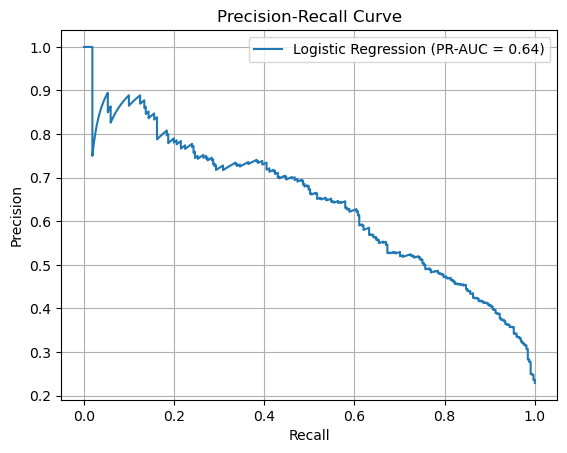

In [109]:
plt.figure()
plt.plot(recall, precision, label=f'Logistic Regression (PR-AUC = {pr_auc_log:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='PRAUC',
     class_weights=[1, 3],
    random_seed=42,
    verbose=100
)


In [112]:
y_train_binary = y_train.map({'No': 0, 'Yes': 1})
cat_model.fit(
    x_train,
    y_train_binary,
    cat_features=cat_cols,
    eval_set=(x_test, y_test_binary),
    use_best_model=True
)
cat_pred_train=cat_model.predict(x_train)
cat_pred=cat_model.predict(x_test)
cat_prob=cat_model.predict_proba(x_test)[:,1]
cat_prob_train=cat_model.predict_proba(x_train)[:,1]

0:	learn: 0.8212547	test: 0.7881064	best: 0.7881064 (0)	total: 53.8ms	remaining: 26.9s
100:	learn: 0.8653269	test: 0.8242462	best: 0.8254866 (29)	total: 3.79s	remaining: 15s
200:	learn: 0.8780263	test: 0.8242300	best: 0.8254866 (29)	total: 7.51s	remaining: 11.2s
300:	learn: 0.8916875	test: 0.8218111	best: 0.8254866 (29)	total: 11.1s	remaining: 7.36s
400:	learn: 0.9032852	test: 0.8182978	best: 0.8254866 (29)	total: 17.9s	remaining: 4.42s
499:	learn: 0.9137424	test: 0.8145569	best: 0.8254866 (29)	total: 23.4s	remaining: 0us

bestTest = 0.8254866123
bestIteration = 29

Shrink model to first 30 iterations.


In [113]:
y_train_binary = y_train.map({'No': 0, 'Yes': 1})
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
print(classification_report(y_train_binary,cat_pred_train))
pr_auc_cat=average_precision_score(y_train_binary,cat_prob_train)
print('PR_AUC_cat-',pr_auc_cat)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4072
           1       0.51      0.82      0.63      1536

    accuracy                           0.74      5608
   macro avg       0.71      0.76      0.71      5608
weighted avg       0.80      0.74      0.75      5608

PR_AUC_cat- 0.6682850193275376


In [191]:
y_train_binary = y_train.map({'No': 0, 'Yes': 1})
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
print(classification_report(y_test_binary,cat_pred))
pr_auc_cat=average_precision_score(y_test_binary,cat_prob)
print('PR_AUC_cat-',pr_auc_cat)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1081
           1       0.45      0.82      0.58       321

    accuracy                           0.72      1402
   macro avg       0.69      0.76      0.69      1402
weighted avg       0.82      0.72      0.75      1402

PR_AUC_cat- 0.641931577584159


In [203]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
off_cat=np.zeros(len(x_train))
test_cat=np.zeros(len(x_test))
cat_feature_idx = [x_train.columns.get_loc(col) for col in cat_cols]

In [209]:
for fold,(tr,val) in enumerate(skf.split(x_train,y_train)):
      print(fold+1)
      x_tr,x_val=x_train.iloc[tr],x_train.iloc[val]
      y_tr,y_val=y_train.iloc[tr],y_train.iloc[val]
    
      y_tr_bin  = y_tr.map({'No': 0, 'Yes': 1})
      y_val_bin = y_val.map({'No': 0, 'Yes': 1})
    
      cat_model_cv = CatBoostClassifier(
          iterations=500,
          learning_rate=0.05,
          depth=6,
          loss_function='Logloss',
          eval_metric='PRAUC',
          class_weights=[1, 3],
          random_seed=42,
          verbose=False,
          early_stopping_rounds=50
      )
      cat_model_cv.fit(
          x_tr,
          y_tr_bin,
          cat_features=cat_feature_idx,
          eval_set=(x_val, y_val_bin),
          use_best_model=True
      )
    
      off_cat[val]=cat_model.predict_proba(x_val)[:,1]
      test_cat+=cat_model.predict_proba(x_test)[:,1]/skf.n_splits


1
2
3
4
5


In [211]:
pr_auc_cat=average_precision_score(y_test_binary,test_cat)
print('PR_AUC_cat-',pr_auc_cat)

PR_AUC_cat- 0.6414949532427867


In [213]:
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (test_cat >= t).astype(int)
    p = precision_score(y_test_binary, preds)
    r = recall_score(y_test_binary, preds)
    print(f"Threshold={t:.2f} | Precision={p:.2f} | Recall={r:.2f}")

Threshold=0.10 | Precision=0.30 | Recall=0.99
Threshold=0.15 | Precision=0.32 | Recall=0.98
Threshold=0.20 | Precision=0.34 | Recall=0.96
Threshold=0.25 | Precision=0.35 | Recall=0.94
Threshold=0.30 | Precision=0.37 | Recall=0.93
Threshold=0.35 | Precision=0.39 | Recall=0.92
Threshold=0.40 | Precision=0.41 | Recall=0.88
Threshold=0.45 | Precision=0.44 | Recall=0.85
Threshold=0.50 | Precision=0.46 | Recall=0.82
Threshold=0.55 | Precision=0.50 | Recall=0.78
Threshold=0.60 | Precision=0.52 | Recall=0.73
Threshold=0.65 | Precision=0.56 | Recall=0.68
Threshold=0.70 | Precision=0.60 | Recall=0.62
Threshold=0.75 | Precision=0.64 | Recall=0.52
Threshold=0.80 | Precision=0.68 | Recall=0.38
Threshold=0.85 | Precision=0.76 | Recall=0.27


In [215]:
best_threshold = 0.38
cat_pred_final = (test_cat >= best_threshold).astype(int)

print(classification_report(y_test_binary, cat_pred_final))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      1081
           1       0.40      0.90      0.55       321

    accuracy                           0.67      1402
   macro avg       0.68      0.75      0.65      1402
weighted avg       0.83      0.67      0.70      1402



In [217]:
cat_precision, cat_recall, cat_thresholds = precision_recall_curve(
    y_test_binary,
    test_cat
)

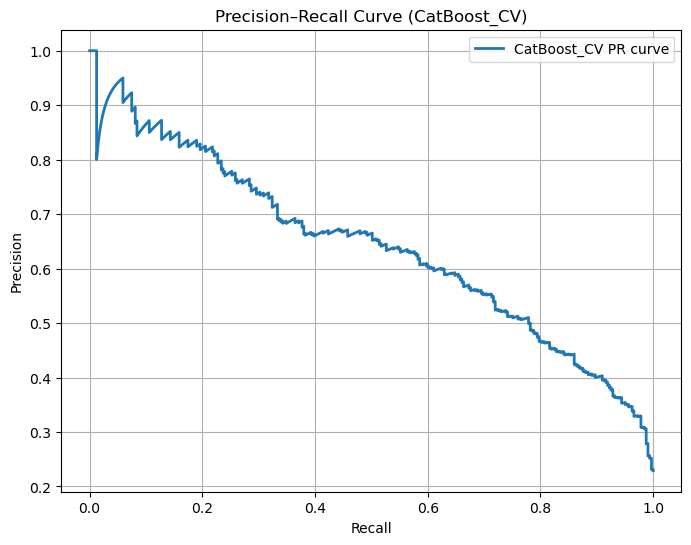

In [221]:
plt.figure(figsize=(8, 6))
plt.plot(cat_recall, cat_precision, label="CatBoost_CV PR curve", linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (CatBoost_CV)")
plt.legend()
plt.grid(True)
plt.show()


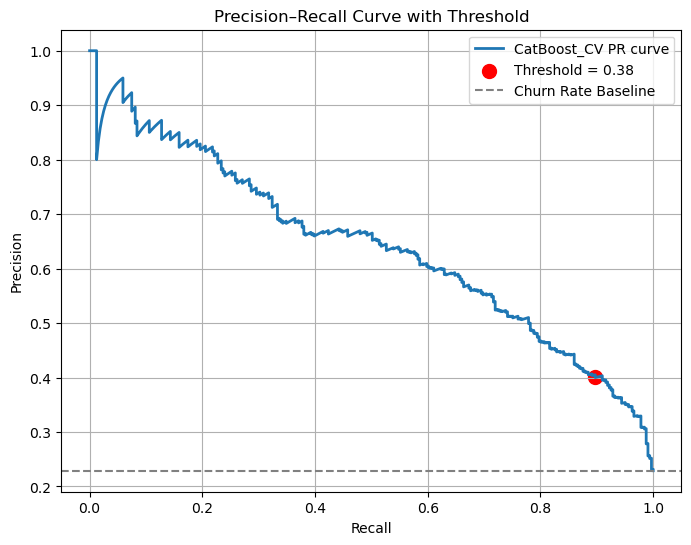

In [225]:
import numpy as np

target_threshold = 0.38

# find closest threshold index
idx = np.argmin(np.abs(cat_thresholds - target_threshold))

plt.figure(figsize=(8, 6))
plt.plot(cat_recall, cat_precision, label="CatBoost_CV PR curve", linewidth=2)

plt.scatter(
    cat_recall[idx + 1],
    cat_precision[idx + 1],
    color="red",
    s=100,
    label=f"Threshold = {target_threshold}"
)
plt.axhline(
    y=y_test_binary.mean(),
    color="gray",
    linestyle="--",
    label="Churn Rate Baseline"
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with Threshold")
plt.legend()
plt.grid(True)
plt.show()




In [119]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": x_train.columns,
    "importance":cat_model.get_feature_importance(type="PredictionValuesChange")
}).sort_values(by="importance", ascending=False)

feature_importance.head(10)


,feature,importance
14,Contract,35.109891
4,tenure,11.290765
12,StreamingTV,9.131288
17,MonthlyCharges,8.377041
7,InternetService,7.204097
8,OnlineSecurity,6.868005
18,TotalCharges,5.907263
16,PaymentMethod,4.304445
11,TechSupport,3.740086
9,OnlineBackup,3.682110


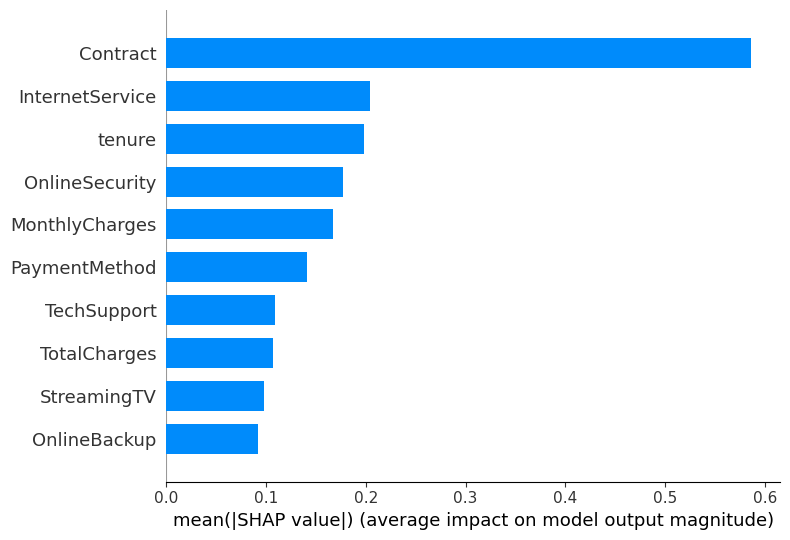

In [162]:
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(
    shap_values,
    x_train,
    plot_type="bar",
    max_display=10
)



